In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
# using the attribute information as the column names
col_names = ['ID_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli', 'Mitoses', 'Class']
breast_can =  pd.read_csv(csv_url, names = col_names)
# class: (2 for benign, 4 for malignant)



In [11]:
breast_can_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 49.3+ KB


In [17]:
float(breast_can['Bare_Nuclei'][0])

1.0

In [24]:
#convert_dict = {'Bare_Nuclei': float}
#for i in range(len(breast_can['Bare_Nuclei'])):
breast_can['Bare_Nuclei'] = breast_can['Bare_Nuclei'].astype(int)

ValueError: invalid literal for int() with base 10: '?'

In [43]:
breast_can_features = breast_can.drop(['Class'], axis=1)
breast_can_features = breast_can_features.drop(['ID_number'], axis=1)
breast_can_features = breast_can_features.drop(['Bare_Nuclei'], axis=1)
breast_can_features_1 = breast_can.drop(['Bare_Nuclei'], axis=1)
breast_can_features.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


In [27]:
breast_can_features

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,1,1,1
695,2,1,1,1,2,1,1,1
696,5,10,10,3,7,8,10,2
697,4,8,6,4,3,10,6,1


In [28]:
breast_can_features.isnull().sum()

Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [29]:
standardized = StandardScaler()
standardized.fit(breast_can_features)

StandardScaler()

In [30]:
scaled_data = standardized.transform(breast_can_features)

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=3)

In [33]:
pca.fit(scaled_data)

PCA(n_components=3)

In [34]:
pca.fit(scaled_data)

PCA(n_components=3)

In [35]:
x_pca = pca.transform(scaled_data)

In [37]:
scaled_data.shape

(699, 8)

In [38]:
x_pca.shape

(699, 3)

In [50]:
len(x_pca)

699

In [52]:
def distance(x,y,z):
    return x**2 + y**2 + z**2
dist_list = []
for i in range(len(x_pca)):
    dist_list.append(distance(x_pca[i][0],x_pca[i][1],x_pca[i][2]))
#print(dist_list)

In [54]:
max_distance = max(dist_list)
max_distance

64.58387920313746

In [45]:
def diag(x):
    if x == 4:
        return 1
    else:
        return 0
df_diag = breast_can['Class'].apply(diag)

In [40]:
import matplotlib.pyplot as plt

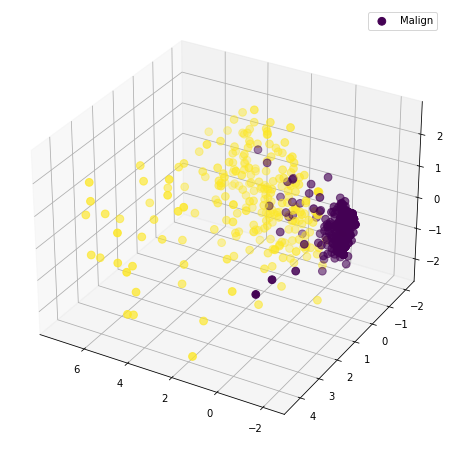

In [46]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_pca[:,0], x_pca[:,1],x_pca[:,2],c=df_diag, s = 60)
ax.legend(['Malign'])
ax.view_init(30,120)

<AxesSubplot:>

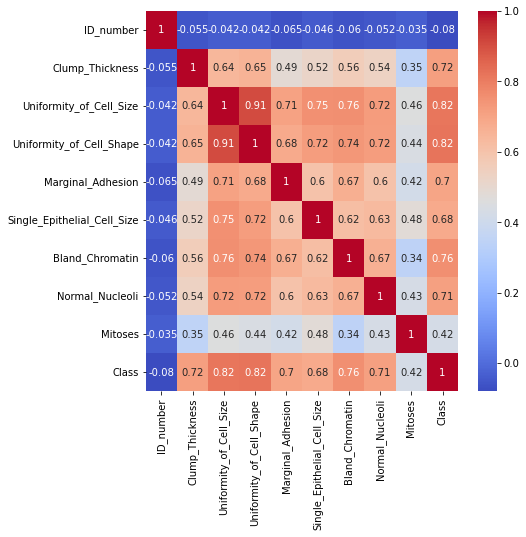

In [12]:
corr = breast_can.corr()
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(corr,annot=True,ax = ax, cmap = 'coolwarm')

In [55]:
from qiskit import IBMQ
IBMQ.save_account('3ccb2d17a0f19c3ce64cf44b3e1c90d3369ea562672f7315624ee8d92bb4350e10b643e3b2af92eef73c029e051518c2a833fb0ffa2e600b2c6c65ed5dd29d40')
IBMQ.load_account()
from qiskit import *
import math as m
import time
from copy import deepcopy
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
#simulators
S_simulator = Aer.backends(name = 'statevector_simulator')[0]
M_simulator = Aer.backends(name = 'qasm_simulator')[0]
U_simulator = Aer.backends(name = 'unitary_simulator')[0]
#provider = IBMQ.get_provider(hub = 'ibm-q-research')

configrc.store_credentials:WARNING:2022-12-28 12:01:09,080: Credentials already present. Set overwrite=True to overwrite.


In [56]:
def decimalToBinary(n,N):  # bin returns the binary representation of an integer.  n is the input decimal and N is the length of the string 
    bin1=bin(n).replace("0b", "")
    bin2='0'*(N-len(bin1))+bin1
    return bin2

In [57]:
def binaryToDecimal(binary):
     
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    print(decimal) 

In [58]:
import math

In [59]:
nq = int(math.log(max(dist_list),2))+ 1  # representing the distances in terms of qubit 
int_list_dist=[int(i) for i in dist_list]
bin_dist = [decimalToBinary(i,nq) for i in int_list_dist] # all the distances from city k1 = 14 in binary form 
print(type(len(int_list_dist)))
print(len(bin_dist))  # left one is the most significant bit 

<class 'int'>
699


In [60]:
nq

7

In [61]:
nq = int(math.log(max(dist_list),2))+1 # number of qubits 
x1= np.zeros(2**nq,dtype = int) # x1 is an empty array 
for i in range(2**nq):    # i ranges from 0 to 2**N = 16384, 2^N also represents the range of distance
    if i in int_list_dist: # if the distance is in int_list_distance(which is the distance of each city from k1 city) then x1[i] = 1
        x1[i]=1
x1=x1/len(x1.nonzero()[0])

In [62]:
x2=x1.reshape(2**nq)
x2= x2/np.linalg.norm(x2)

In [63]:
print(x1)

[0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913 0.02173913
 0.         0.02173913 0.02173913 0.         0.         0.02173913
 0.02173913 0.         0.02173913 0.02173913 0.02173913 0.
 0.02173913 0.02173913 0.         0.         0.         0.
 0.         0.02173913 0.         0.         0.         0.02173913
 0.02173913 0.         0.         0.02173913 0.         0.02173913
 0.         0.         0.02173913 0.         0.02173913 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.    

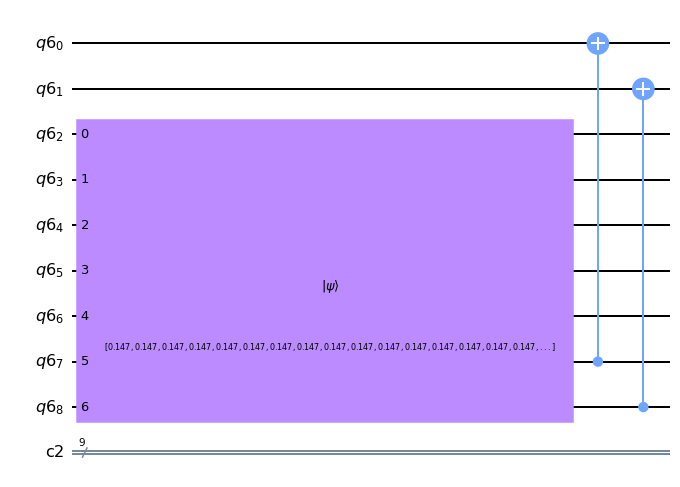

In [79]:
num_clusters = 4
M = int(math.log(num_clusters,2)) # based on clusters 
M
c = ClassicalRegister(nq+M)
# we have N qubits and all are in state x2
# and we apply controlled not to rest of the M qubits(ancillas).
#quantum circuit
q=QuantumRegister(nq+M) # 18 qubits 
#c=ClassicalRegister(N+M)
qc = QuantumCircuit(q,c)
qc.initialize(x2, [i+M for i in range(nq)]) # prepare x2 state on the first 8 qubits  
# qc.initialize(params, qubits=None)
# qubits = quantumregister or a list. these are genreally qubits that are to be initialized
for j in range(M):
    qc.cx(nq+j,j)

job = execute(qc, backend=S_simulator, optimization_level=0)
psi_block2 = job.result().get_statevector(qc, decimals=16) # gives the final statevector of the experiment upto 16 decimal places

qc.draw('mpl')

In [80]:
qc.measure(range(nq+M),range(nq+M)) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

qobj = assemble(qc, shots=8125)
Counts = S_simulator.run(qobj).result().get_counts()

In [81]:
list1=[] # list1 is the list that contains the position of elements in the statevector whose value is greater than 10^-16
list2=[]
for j in range(len(psi_block2)):        
    if abs(psi_block2[j])> 10**(-16): # abs: returns the absolute value of the argument  # why this step? # these are the cities ig
        list1.append(j)
        list2.append(abs(psi_block2[j]))
print(list1)

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 124, 129, 141, 145, 153, 157, 161, 169, 173, 197, 213, 217, 229, 237, 249, 258]


In [82]:
bin_list = [decimalToBinary(i,nq+M) for i in list1]
print(bin_list)

['000000000', '000000100', '000001000', '000001100', '000010000', '000010100', '000011000', '000011100', '000100000', '000100100', '000101000', '000101100', '000110000', '000110100', '000111000', '000111100', '001000000', '001000100', '001001000', '001001100', '001010000', '001010100', '001011000', '001011100', '001100000', '001100100', '001101000', '001101100', '001110000', '001110100', '001111100', '010000001', '010001101', '010010001', '010011001', '010011101', '010100001', '010101001', '010101101', '011000101', '011010101', '011011001', '011100101', '011101101', '011111001', '100000010']


In [83]:
anc_key = list(set([list(Counts.keys())[i][nq:nq+M] for i in range(len(list(Counts.keys())))])) ## last 4 qubits are for the clusters which is bascically ancilla qubits 
List_cluster=[]
for i in range(len(anc_key)):
    cluster=[]
    for j in range(len(list(Counts.keys()))):
        if anc_key[i] == list(Counts.keys())[j][nq:nq+M]:
            cluster.append(list(Counts.keys())[j][0:nq])
    List_cluster.append(cluster)


In [84]:
anc_key

['10', '00', '01']

In [85]:
print(List_cluster)

[['1000000'], ['0011100', '0000011', '0001000', '0011101', '0000001', '0000110', '0010101', '0010001', '0000100', '0010110', '0000101', '0010100', '0011111', '0000000', '0010011', '0001101', '0001011', '0001100', '0001001', '0001111', '0010000', '0011000', '0000111', '0011011', '0011001', '0001010', '0000010', '0010111', '0011010', '0010010', '0001110'], ['0110101', '0100100', '0110110', '0100011', '0110001', '0111110', '0101010', '0111001', '0101011', '0100000', '0111011', '0100111', '0100110', '0101000']]


In [86]:
decimal_cluster_1 = []
decimal_cluster_2 = []
decimal_cluster_3 = []
#decimal_cluster_4 = []

for i in range(len(List_cluster[0])):
    decimal_cluster_1.append(int(List_cluster[0][i],2))

for i in range(len(List_cluster[1])):
    decimal_cluster_2.append(int(List_cluster[1][i],2))

for i in range(len(List_cluster[2])):
    decimal_cluster_3.append(int(List_cluster[2][i],2))

#for i in range(len(List_cluster[3])):
#    decimal_cluster_4.append(int(List_cluster[3][i],2))

decimal_cluster_1.sort()
decimal_cluster_2.sort()
decimal_cluster_3.sort()
#decimal_cluster_4.sort()

print(decimal_cluster_1)
print(decimal_cluster_2)
print(decimal_cluster_3)
#print(decimal_cluster_4)

[64]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31]
[32, 35, 36, 38, 39, 40, 42, 43, 49, 53, 54, 57, 59, 62]


In [87]:
fin_cluster_1 =[]
fin_cluster_2 =[]
fin_cluster_3 =[]
fin_cluster_4 =[]

for j in range(len(dist_list)):
    for i in decimal_cluster_1:
        if i-1 < dist_list[j] < i+1:
            fin_cluster_1.append(dist_list[j])

for j in range(len(dist_list)):
    for i in decimal_cluster_2:
        if i-1 < dist_list[j] < i+1:
            fin_cluster_2.append(dist_list[j])

for j in range(len(dist_list)):
    for i in decimal_cluster_3:
        if i-1 < dist_list[j] < i+1:
            fin_cluster_3.append(dist_list[j])

#for j in range(len(dist_list)):
#    for i in decimal_cluster_4:
#        if i-1 < dist_list[j] < i+1:
#            fin_cluster_4.append(dist_list[j])

fin_cluster_1.sort()
fin_cluster_2.sort()
fin_cluster_3.sort()
#fin_cluster_4.sort()

print(len(set(fin_cluster_1)))
print(len(set(fin_cluster_2)))
print(len(set(fin_cluster_3)))
#print(len(set(fin_cluster_4)))

1
418
23


In [98]:
cl = []
cl1 = []
cl2 = []
for j in range(len(fin_cluster_1)):
    for i in range(len(dist_list)):
        if distance(x_pca[i][0],x_pca[i][1],x_pca[i][2]) == fin_cluster_1[j]  :
            cl.append(x_pca[i][0])
            cl1.append(x_pca[i][1])
            cl2.append(x_pca[i][2])
          

In [100]:
cl2

[0.33194666116423843]

In [101]:
cl_1 = []
cl1_1 = []
cl2_1 = []
for j in range(len(fin_cluster_2)):
    for i in range(len(dist_list)):
        if distance(x_pca[i][0],x_pca[i][1],x_pca[i][2]) == fin_cluster_2[j]  :
            cl_1.append(x_pca[i][0])
            cl1_1.append(x_pca[i][1])
            cl2_1.append(x_pca[i][2])

In [106]:
print(cl_1)

[0.12473354981450155, 0.12473354981450155, 0.04605004462828036, 0.04605004462828036, -0.04939772054958676, -0.04939772054958676, 0.053167179185359376, 0.053167179185359376, -0.17823244910636593, -0.17823244910636593, -0.022309006570397832, -0.022309006570397832, -0.379381713295342, -0.379381713295342, 0.3272038429756054, 0.3272038429756054, -0.31012039628380184, -0.31012039628380184, -0.6170312026749365, -0.6170312026749365, -0.4847149039108063, -0.4847149039108063, -0.6796543990519963, -0.6796543990519963, -0.642354108763842, -0.642354108763842, -0.6471900430256112, -0.6471900430256112, 0.5391196331022078, 0.5391196331022078, 0.1989140377560143, 0.1989140377560143, 0.10635707704001746, 0.10635707704001746, -0.70448800464375, -0.70448800464375, -0.7857925813600383, -0.7857925813600383, -0.8290265067241871, -0.8290265067241871, -0.5504719925959566, -0.5504719925959566, -0.6508709095090653, -0.6508709095090653, -0.8287522559473, -0.8287522559473, 0.15529417281527277, 0.15529417281527277,

In [102]:

cl_2 = []
cl1_2 = []
cl2_2 = []
for j in range(len(fin_cluster_3)):
    for i in range(len(dist_list)):
        if distance(x_pca[i][0],x_pca[i][1],x_pca[i][2]) == fin_cluster_3[j]  :
            cl_2.append(x_pca[i][0])
            cl1_2.append(x_pca[i][1])
            cl2_2.append(x_pca[i][2])

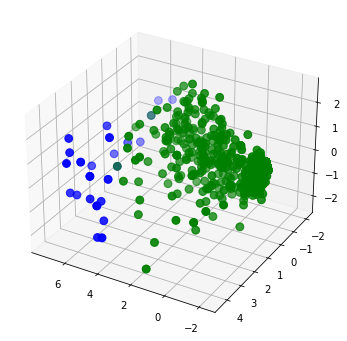

In [108]:

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(cl, cl1,cl2,c='b', s = 60)
ax.scatter(cl_1, cl1_1,cl2_1,c='g', s = 60)
ax.scatter(cl_2, cl1_2,cl2_2,c='b', s = 60)
#ax.legend(['Ma'])
ax.view_init(30,120)

In [97]:
cl2[:,0]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
sns.set_theme()
plt.figure(figsize = (8,6))
plt.scatter(df['x'][:130], df['y'][:130]+6, s =4 ) # 65 and 122
plt.text(df['x'][65], df['y'][65], 'origin')
#plt.text(df['x'][122], df['y'][122], 'origin')
plt.plot(df['x'][122], df['y'][122], marker = 'o',markersize = 9, markeredgecolor = 'green', markerfacecolor = 'red')
plt.plot(df['x'][65], df['y'][65], marker = 'o',markersize = 9, markeredgecolor = 'green', markerfacecolor = 'red')
plt.scatter(cl,cl1, s = 20, c = 'purple', marker = 'o', edgecolors = 'black')
plt.scatter(cl_1,cl1_1, s = 20, c = 'green', marker = 'o', edgecolors = 'black')
plt.scatter(cl_2,cl1_2, s = 20, c = 'red', marker = 'o', edgecolors = 'black')
plt.scatter(cl_3,cl1_3, s = 20, c = 'orange', marker = 'o', edgecolors = 'black')
plt.title('Clustered Cities from Churritz dataset')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x_values, y_values, 'ro',linestyle = '--')